In [7]:
import pandas as pd

In [9]:
apt_list = pd.read_csv('Booli_sold.csv')
apt_list.head()

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
0,3995000,4467.0,73.0,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,3820000,...,59.371033,18.054057,NaN,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/
1,1995000,1773.0,36.0,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,2355000,...,59.371242,18.057821,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
2,5100000,3839.0,81.0,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,6110000,...,59.371617,18.054716,NaN,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/
3,5495000,4483.0,107.0,4.0,2018-08-25 02:56:56,1936.0,Lägenhet,3224374,2018-09-06,8050000,...,59.371480,18.053880,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
4,1995000,1696.0,29.0,1.0,2018-06-15 17:16:19,1936.0,Lägenhet,3185496,2018-06-18,2400000,...,59.372160,18.053542,True,Stockholm,Stockholms län,166,Mäklarhuset,204,Broker,http://www.maklarhuset.se/


In [121]:
ppsqm = apt_list['listPrice'] / apt_list['livingArea']
apt_list['ppsqm'] = ppsqm
apt_list.head()

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url,ppsqm
0,3995000,4467.0,73.0,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,3820000,...,18.054057,NaN,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/,54726.027397
1,1995000,1773.0,36.0,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,2355000,...,18.057821,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/,55416.666667
2,5100000,3839.0,81.0,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,6110000,...,18.054716,NaN,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/,62962.962963
3,5495000,4483.0,107.0,4.0,2018-08-25 02:56:56,1936.0,Lägenhet,3224374,2018-09-06,8050000,...,18.053880,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/,51355.140187
4,1995000,1696.0,29.0,1.0,2018-06-15 17:16:19,1936.0,Lägenhet,3185496,2018-06-18,2400000,...,18.053542,True,Stockholm,Stockholms län,166,Mäklarhuset,204,Broker,http://www.maklarhuset.se/,68793.103448


In [15]:
cleaned_apt_list = apt_list[['location.address.streetAddress', 'listPrice', 'livingArea', 'ppsqm']]
cleaned_apt_list.sort_values('ppsqm', ascending=False).head()


,location.address.streetAddress,listPrice,livingArea,ppsqm
10,Ekhagsvägen 9,2295000,29.0,79137.931034
50,Ekhagsvägen 8,1890000,24.0,78750.000000
54,Ekhagsvägen 10,1795000,23.0,78043.478261
49,Torphagsvägen 12,3495000,47.0,74361.702128
24,Torphagsvägen 4,2500000,35.0,71428.571429


In [33]:
filtered_apt_list = cleaned_apt_list[cleaned_apt_list['location.address.streetAddress'].str.startswith('Ekhagsvägen')]
filtered_apt_list.sort_values('ppsqm', ascending=False)
ekhags_average_ppsqm = filtered_apt_list['ppsqm'].mean()
print(f"The average price per square meter for apartments on Ekhagsvägen is: {ekhags_average_ppsqm:.2f}")

The average price per square meter for apartments on Ekhagsvägen is: 54841.59


In [90]:
df = pd.read_csv('2018_R_per_kommun.csv', sep=';', decimal=',', encoding='utf-8')
stockholm_votes = df[df['LÄNSNAMN'] == 'Stockholms län']
stockholm_votes = stockholm_votes[['KOMMUNNAMN', 'RÖSTBERÄTTIGADE', 'RÖSTANDE', 'RÖSTER GILTIGA']]
stockholm_votes_legit_tot = stockholm_votes["RÖSTER GILTIGA"].sum()
print(stockholm_votes_legit_tot)


1426237


In [91]:
highest_S_percentage = df.sort_values('S', ascending=False).head(1)
S_kommun = highest_S_percentage['KOMMUNNAMN'] 
print(S_kommun)

188    Munkfors
Name: KOMMUNNAMN, dtype: object


In [95]:
top_three_participation = df[['LÄNSNAMN','KOMMUNNAMN', 'VALDELTAGANDE']]
top_three_participation.sort_values('VALDELTAGANDE', ascending=False).head(3)


,LÄNSNAMN,KOMMUNNAMN,VALDELTAGANDE
103,Skåne län,Lomma,93.86
59,Jönköpings län,Habo,93.35
98,Skåne län,Vellinge,93.13


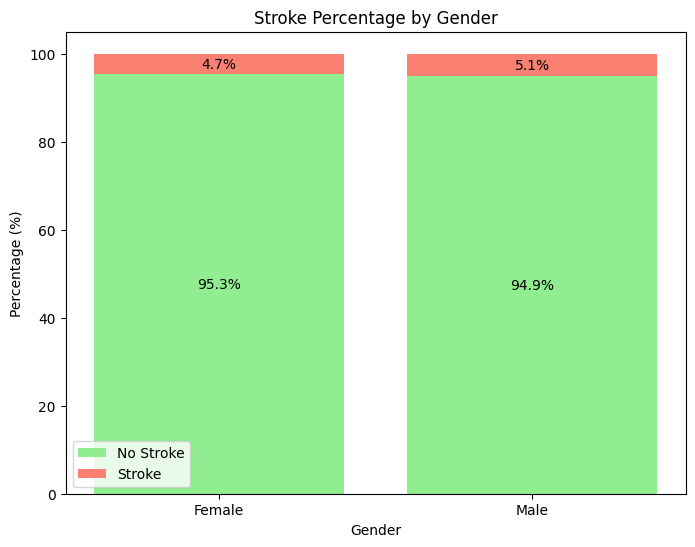

In [120]:
import matplotlib.pyplot as plt 
df = pd.read_csv('stroke-data.csv', sep=',', decimal='.', encoding='utf-8')
df = df[df['gender'] != 'Other']
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'total_count']
total_individuals = gender_counts['total_count'].sum()
gender_counts['gender_ratio'] = (gender_counts['total_count'] / total_individuals) * 100

stroke_data = df.groupby(['gender', 'stroke']).size().reset_index(name='count')

stroke_pivot = stroke_data.pivot(index='gender', columns='stroke', values='count').reset_index()
stroke_pivot = stroke_pivot.fillna(0)
stroke_pivot.columns = ['gender', 'No Stroke', 'Stroke']
stroke_pivot['total'] = stroke_pivot['No Stroke'] + stroke_pivot['Stroke']
stroke_pivot['No Stroke %'] = (stroke_pivot['No Stroke'] / stroke_pivot['total']) * 100
stroke_pivot['Stroke %'] = (stroke_pivot['Stroke'] / stroke_pivot['total']) * 100
plt.figure(figsize=(8, 6))
plt.bar(stroke_pivot['gender'], stroke_pivot['No Stroke %'], label='No Stroke', color='lightgreen')
plt.bar(stroke_pivot['gender'], stroke_pivot['Stroke %'], bottom=stroke_pivot['No Stroke %'], label='Stroke', color='salmon')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.title('Stroke Percentage by Gender')
for idx, row in stroke_pivot.iterrows():
    plt.text(idx, row['No Stroke %'] / 2, f"{row['No Stroke %']:.1f}%", ha='center', va='center', color='black')
    plt.text(idx, row['No Stroke %'] + (row['Stroke %'] / 2), f"{row['Stroke %']:.1f}%", ha='center', va='center', color='black')
plt.legend()
plt.show()